# Linear Regression

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_excel('C:/Users/Acer/Desktop/thesis/tweets/merged_cleaned_data.xlsx')

# Ensure all text data is string and handle any NaN values
data['text'] = data['text'].fillna('').astype(str)

# Split data into features and target
X = data['text']
y = data['label'].apply(lambda x: 1 if x == 'Depression' else 0)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Convert text data into TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.80      0.77       128
           1       0.85      0.80      0.83       177

    accuracy                           0.80       305
   macro avg       0.80      0.80      0.80       305
weighted avg       0.81      0.80      0.80       305



# Long Short-Term Memory networks (LSTM)

In [2]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_excel('C:/Users/Acer/Desktop/thesis/tweets/merged_cleaned_data.xlsx')

# Ensure all text data is string and handle any NaN values
data['text'] = data['text'].fillna('').astype(str)
data['label'] = data['label'].apply(lambda x: 1 if x == 'Depression' else 0)

# Tokenization and sequence padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
X = pad_sequences(sequences, maxlen=100)

# Train-test split
y = data['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# LSTM model architecture
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=120, input_length=100))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 120)          600000    
                                                                 
 spatial_dropout1d (Spatial  (None, 100, 120)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               88400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 688501 (2.63 MB)
Trainable params: 688501 (2.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
15/15 [==============================] - 5s 175ms/step - loss: 0.6617 - accu

# Optimize the model performance

In [3]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
data = pd.read_excel('C:/Users/Acer/Desktop/thesis/tweets/merged_cleaned_data.xlsx')

# Preprocess the data
data['text'] = data['text'].fillna('').astype(str)
data['label'] = data['label'].apply(lambda x: 1 if x == 'Depression' else 0)

# Tokenize text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
X = pad_sequences(sequences, maxlen=100)

# Labels
y = np.array(data['label'])

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Building the LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=120, input_length=100))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.25))  # Additional dropout layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Model summary
model.summary()


Epoch 1/5
15/15 [==============================] - 5s 193ms/step - loss: 0.6594 - accuracy: 0.6765 - val_loss: 0.5788 - val_accuracy: 0.7115
Epoch 2/5
15/15 [==============================] - 3s 182ms/step - loss: 0.4972 - accuracy: 0.7399 - val_loss: 0.4608 - val_accuracy: 0.7672
Epoch 3/5
15/15 [==============================] - 3s 184ms/step - loss: 0.3591 - accuracy: 0.8361 - val_loss: 0.3961 - val_accuracy: 0.7803
Epoch 4/5
15/15 [==============================] - 3s 179ms/step - loss: 0.6151 - accuracy: 0.8787 - val_loss: 0.3910 - val_accuracy: 0.7934
Epoch 5/5
10/10 [==============================] - 0s 15ms/step - loss: 0.5211 - accuracy: 0.7902
Accuracy: 79.02%
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 120)          600000    
                                                                 
 spatial_dropout1d_1 (Spati  (None,

# Detailed Model Evaluation

10/10 [==============================] - 0s 15ms/step
Classification Report:
                 precision    recall  f1-score   support

Non-depression       0.75      0.76      0.75       128
    Depression       0.82      0.81      0.82       177

      accuracy                           0.79       305
     macro avg       0.78      0.79      0.79       305
  weighted avg       0.79      0.79      0.79       305



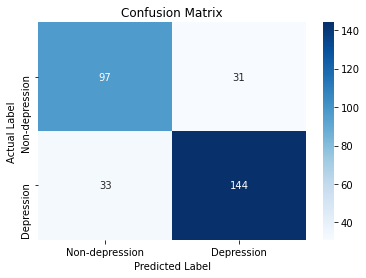

In [4]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_pred is the array of predictions from the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Non-depression', 'Depression'])
print("Classification Report:\n", report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-depression', 'Depression'], yticklabels=['Non-depression', 'Depression'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


# Convolutional Neural Network (CNN)

In [5]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_excel('C:/Users/Acer/Desktop/thesis/tweets/merged_cleaned_data.xlsx')

# Preprocess the data
data['text'] = data['text'].fillna('').astype(str)
data['label'] = data['label'].apply(lambda x: 1 if x == 'Depression' else 0)

# Tokenization and sequence padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
X = pad_sequences(sequences, maxlen=100)

# Convert labels to numpy array
y = np.array(data['label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the CNN model architecture
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling1D(pool_size=2),
    GlobalMaxPooling1D(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 128)          640000    
                                                                 
 conv1d (Conv1D)             (None, 100, 64)           24640     
                                                                 
 max_pooling1d (MaxPooling1  (None, 50, 64)            0         
 D)                                                              
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 664705 (2.54 MB)
Trainable params: 66470

# Optimize the model performance (CNN Model with Early Stopping)

In [6]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
data = pd.read_excel('C:/Users/Acer/Desktop/thesis/tweets/merged_cleaned_data.xlsx')

# Ensure all text data is string and handle any NaN values
data['text'] = data['text'].fillna('').astype(str)
data['label'] = data['label'].apply(lambda x: 1 if x == 'Depression' else 0)

# Tokenization and sequence padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
X = pad_sequences(sequences, maxlen=100)

# Labels to numpy array
y = np.array(data['label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Building the CNN model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling1D(pool_size=2),
    GlobalMaxPooling1D(),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Model summary
model.summary()

# Train the model with early stopping
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 128)          640000    
                                                                 
 conv1d_1 (Conv1D)           (None, 100, 64)           24640     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 50, 64)            0         
 g1D)                                                            
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

# Further Enhancement

In [8]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_excel('C:/Users/Acer/Desktop/thesis/tweets/merged_cleaned_data.xlsx')

# Ensure all text data is string and handle any NaN values
data['text'] = data['text'].fillna('').astype(str)
data['label'] = data['label'].apply(lambda x: 1 if x == 'Depression' else 0)

# Tokenization and sequence padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
X = pad_sequences(sequences, maxlen=100)

# Convert labels to numpy array
y = np.array(data['label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the model
def create_model():
    model = Sequential([
        Embedding(input_dim=5000, output_dim=128, input_length=100),
        Conv1D(64, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01)),
        MaxPooling1D(2),
        GlobalMaxPooling1D(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.25)

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 128)          640000    
                                                                 
 conv1d_2 (Conv1D)           (None, 100, 64)           24640     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 50, 64)            0         
 g1D)                                                            
                                                                 
 global_max_pooling1d_2 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                

# Improvement of Model (advanced optimizers, learning rate schedulers, deeper network architecture, and performance evaluation through detailed metrics)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 128)          640000    
                                                                 
 conv1d_3 (Conv1D)           (None, 100, 64)           24640     
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 50, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_4 (Conv1D)           (None, 50, 128)           24704     
                                                                 
 global_max_pooling1d_3 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_3 (Dropout)         (None, 128)              

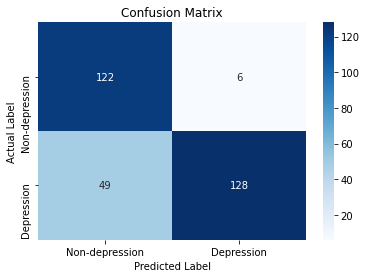

In [9]:
import pandas as pd
import numpy as np
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('C:/Users/Acer/Desktop/thesis/tweets/merged_cleaned_data.xlsx')

# Ensure all text data is string and handle any NaN values
data['text'] = data['text'].fillna('').astype(str)
data['label'] = data['label'].apply(lambda x: 1 if x == 'Depression' else 0)

# Tokenization and sequence padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
X = pad_sequences(sequences, maxlen=100)

# Convert labels to numpy array
y = np.array(data['label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the model
def create_model():
    model = Sequential([
        Embedding(input_dim=5000, output_dim=128, input_length=100),
        Conv1D(64, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01)),
        MaxPooling1D(2),
        Conv1D(128, 3, padding='same', activation='relu'),
        GlobalMaxPooling1D(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

model = create_model()

# Define learning rate scheduler
def step_decay(epoch):
    initial_lrate = 0.01
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

lrate = LearningRateScheduler(step_decay)

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

# Train the model with learning rate scheduler
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, callbacks=[lrate])

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Generate classification report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=['Non-depression', 'Depression']))

# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-depression', 'Depression'], yticklabels=['Non-depression', 'Depression'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 128)          640000    
                                                                 
 conv1d_5 (Conv1D)           (None, 100, 64)           24640     
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 50, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_6 (Conv1D)           (None, 50, 128)           24704     
                                                                 
 global_max_pooling1d_4 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_4 (Dropout)         (None, 128)              

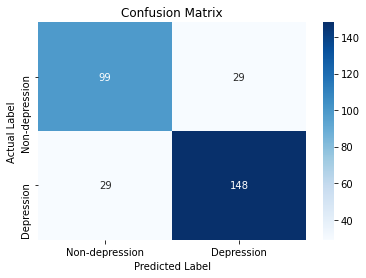

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = pd.read_excel('C:/Users/Acer/Desktop/thesis/tweets/merged_cleaned_data.xlsx')

# Ensure all text data is string and handle any NaN values
data['text'] = data['text'].fillna('').astype(str)
data['label'] = data['label'].apply(lambda x: 1 if x == 'Depression' else 0)

# Tokenization and sequence padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
X = pad_sequences(sequences, maxlen=100)

# Convert labels to numpy array
y = np.array(data['label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the model
def create_model():
    model = Sequential([
        Embedding(input_dim=5000, output_dim=128, input_length=100),
        Conv1D(64, 3, padding='same', activation='relu', kernel_regularizer=l2(0.01)),
        MaxPooling1D(2),
        Conv1D(128, 3, padding='same', activation='relu'),
        GlobalMaxPooling1D(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test),
                    callbacks=[reduce_lr, early_stopping])

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Generate classification report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=['Non-depression', 'Depression']))

# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-depression', 'Depression'], yticklabels=['Non-depression', 'Depression'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


# Hybrid CNN-LSTM Model

In [11]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_excel('C:/Users/Acer/Desktop/thesis/tweets/merged_cleaned_data.xlsx')

# Preprocess data
data['text'] = data['text'].fillna('').astype(str)
data['label'] = data['label'].apply(lambda x: 1 if x == 'Depression' else 0)

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
X = pad_sequences(sequences, maxlen=100)

# Labels to numpy array
y = np.array(data['label'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the hybrid model architecture
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    Conv1D(64, 5, activation='relu'),
    MaxPooling1D(pool_size=4),
    LSTM(100),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 128)          640000    
                                                                 
 conv1d_7 (Conv1D)           (None, 96, 64)            41024     
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 24, 64)            0         
 g1D)                                                            
                                                                 
 lstm_2 (LSTM)               (None, 100)               66000     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                      

# Improvemet with Early Stopping and Regularization

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 128)          640000    
                                                                 
 conv1d_8 (Conv1D)           (None, 96, 64)            41024     
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 24, 64)            0         
 g1D)                                                            
                                                                 
 lstm_3 (LSTM)               (None, 24, 100)           66000     
                                                                 
 global_max_pooling1d_5 (Gl  (None, 100)               0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_6 (Dropout)         (None, 100)              

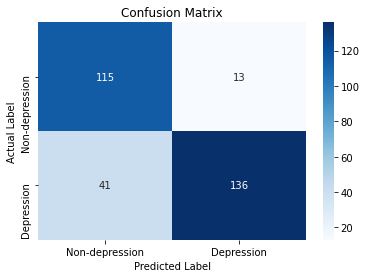

In [12]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dropout, Dense, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('C:/Users/Acer/Desktop/thesis/tweets/merged_cleaned_data.xlsx')

# Ensure all text data is string and handle any NaN values
data['text'] = data['text'].fillna('').astype(str)
data['label'] = data['label'].apply(lambda x: 1 if x == 'Depression' else 0)

# Tokenization and sequence padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
X = pad_sequences(sequences, maxlen=100)

# Labels to numpy array
y = np.array(data['label'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the hybrid CNN-LSTM model
def create_model():
    model = Sequential([
        Embedding(input_dim=5000, output_dim=128, input_length=100),
        Conv1D(64, 5, activation='relu'),
        MaxPooling1D(pool_size=4),
        LSTM(100, return_sequences=True, kernel_regularizer=l2(0.01)),
        GlobalMaxPooling1D(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
test_scores = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_scores[1]*100:.2f}%")

# Generate classification report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=['Non-depression', 'Depression']))

# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-depression', 'Depression'], yticklabels=['Non-depression', 'Depression'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 128)          640000    
                                                                 
 conv1d_9 (Conv1D)           (None, 96, 64)            41024     
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 24, 64)            0         
 g1D)                                                            
                                                                 
 lstm_4 (LSTM)               (None, 24, 100)           66000     
                                                                 
 global_max_pooling1d_6 (Gl  (None, 100)               0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_7 (Dropout)         (None, 100)              

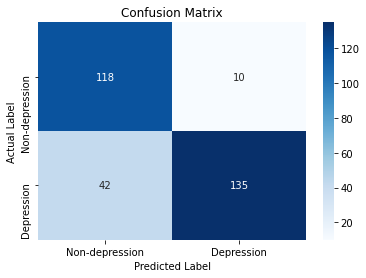

In [13]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dropout, Dense, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import losses

# Load the dataset
data = pd.read_excel('C:/Users/Acer/Desktop/thesis/tweets/merged_cleaned_data.xlsx')

# Ensure all text data is string and handle any NaN values
data['text'] = data['text'].fillna('').astype(str)
data['label'] = data['label'].apply(lambda x: 1 if x == 'Depression' else 0)

# Tokenization and sequence padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
X = pad_sequences(sequences, maxlen=100)

# Labels to numpy array
y = np.array(data['label'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the hybrid CNN-LSTM model with dropout
def create_model():
    model = Sequential([
        Embedding(input_dim=5000, output_dim=128, input_length=100),
        Conv1D(64, 5, activation='relu'),
        MaxPooling1D(pool_size=4),
        LSTM(100, return_sequences=True),
        GlobalMaxPooling1D(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', 
                  loss=losses.BinaryCrossentropy(),
                  metrics=['accuracy'],
                  loss_weights=[0.7, 1.3])  # Adjust these weights as needed
    return model

model = create_model()
model.summary()

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
test_scores = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_scores[1]*100:.2f}%")

# Generate classification report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=['Non-depression', 'Depression']))

# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-depression', 'Depression'], yticklabels=['Non-depression', 'Depression'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


# Further Improvement

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 128)          640000    
                                                                 
 conv1d_10 (Conv1D)          (None, 96, 64)            41024     
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 24, 64)            0         
 g1D)                                                            
                                                                 
 lstm_5 (LSTM)               (None, 24, 100)           66000     
                                                                 
 global_max_pooling1d_7 (Gl  (None, 100)               0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_8 (Dropout)         (None, 100)             

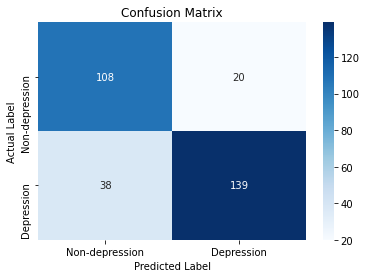

In [14]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dropout, Dense, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import class_weight
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('C:/Users/Acer/Desktop/thesis/tweets/merged_cleaned_data.xlsx')

# Preprocess data
data['text'] = data['text'].fillna('').astype(str)
data['label'] = data['label'].apply(lambda x: 1 if x == 'Depression' else 0)

# Tokenization and sequence padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
X = pad_sequences(sequences, maxlen=100)

# Labels to numpy array
y = np.array(data['label'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Calculate class weights
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(weights))

# Define the hybrid CNN-LSTM model
def create_model():
    model = Sequential([
        Embedding(input_dim=5000, output_dim=128, input_length=100),
        Conv1D(64, 5, activation='relu'),
        MaxPooling1D(pool_size=4),
        LSTM(100, return_sequences=True),
        GlobalMaxPooling1D(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with class weights
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), class_weight=class_weights, callbacks=[early_stopping])

# Evaluate the model
test_scores = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_scores[1]*100:.2f}%")

# Generate classification report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=['Non-depression', 'Depression']))

# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-depression', 'Depression'], yticklabels=['Non-depression', 'Depression'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 100, 128)          640000    
                                                                 
 conv1d_11 (Conv1D)          (None, 96, 64)            41024     
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 24, 64)            0         
 g1D)                                                            
                                                                 
 lstm_6 (LSTM)               (None, 24, 100)           66000     
                                                                 
 global_max_pooling1d_8 (Gl  (None, 100)               0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_9 (Dropout)         (None, 100)             

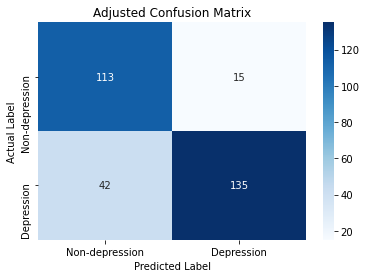

In [15]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dropout, Dense, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import class_weight

# Load the dataset
data = pd.read_excel('C:/Users/Acer/Desktop/thesis/tweets/merged_cleaned_data.xlsx')

# Preprocess data
data['text'] = data['text'].fillna('').astype(str)
data['label'] = data['label'].apply(lambda x: 1 if x == 'Depression' else 0)

# Tokenization and sequence padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
X = pad_sequences(sequences, maxlen=100)

# Labels to numpy array
y = np.array(data['label'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Calculate class weights for balancing the training
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(weights))

# Define the hybrid CNN-LSTM model
def create_model():
    model = Sequential([
        Embedding(input_dim=5000, output_dim=128, input_length=100),
        Conv1D(64, 5, activation='relu'),
        MaxPooling1D(pool_size=4),
        LSTM(100, return_sequences=True),
        GlobalMaxPooling1D(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with class weights
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), class_weight=class_weights, callbacks=[early_stopping])

# Evaluate the model
test_scores = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_scores[1]*100:.2f}%")

# Predict probabilities
probabilities = model.predict(X_test)
threshold = 0.4  # Adjust this threshold based on the desired recall-precision balance
y_pred_adjusted = (probabilities > threshold).astype(int)

# Generate classification report
print(classification_report(y_test, y_pred_adjusted, target_names=['Non-depression', 'Depression']))

# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred_adjusted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-depression', 'Depression'], yticklabels=['Non-depression', 'Depression'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Adjusted Confusion Matrix')
plt.show()
